In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
!pip install scikit-learn

In [ ]:
boston = pd.read_csv('BostonHousing.csv')

In [ ]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
meanings = {
    'crim': 'Per capita crime rate by town',
    'zn': 'Proportion of residential land zoned for large lots over 25,000 sq. ft.',
    'indus': 'Proportion of non-retail business acres per town',
    'chas': 'Charles River dummy variable (1 if the tract bounds river, 0 otherwise)',
    'nox': 'Concentration of nitrogen oxides in the air (parts per 10 million)',
    'rm': 'Average number of rooms per dwelling',
    'age': 'Proportion of owner-occupied units built before 1940',
    'dis': 'Weighted distances to Boston employment centers',
    'rad': 'Index of accessibility to radial highways',
    'tax': 'Property tax rate per $10,000',
    'ptratio': 'Pupil-teacher ratio by town',
    'b': '1000(Bk - 0.63)^2, where Bk is the proportion of Black residents by town',
    'lstat': 'Percentage of lower status of the population',
    'medv': 'Median value of owner-occupied homes in $1000s'
}


As we can see over here that most of the values of chas and zn are zero. So we will check if most of their values are zero then we will remove those because that will be of no value to us

In [ ]:
zeros_count = (boston == 0).sum()
print(zeros_count)

crim         0
zn         372
indus        0
chas       471
nox          0
rm           0
age          0
dis          0
rad          0
tax          0
ptratio      0
b            0
lstat        0
medv         0
dtype: int64


In [ ]:
boston.fillna(boston.mean(), inplace=True)

We are going to remove the zn and chas as there are way too many zeros out of total 506 inputs.

In [ ]:
boston = boston.drop(['zn','chas'], axis=1)

In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   indus    506 non-null    float64
 2   nox      506 non-null    float64
 3   rm       506 non-null    float64
 4   age      506 non-null    float64
 5   dis      506 non-null    float64
 6   rad      506 non-null    int64  
 7   tax      506 non-null    int64  
 8   ptratio  506 non-null    float64
 9   b        506 non-null    float64
 10  lstat    506 non-null    float64
 11  medv     506 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 47.6 KB


# Spliting Data
Now I will split the data into training and testing subsets.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, test_df = train_test_split(boston, test_size=0.2, random_state=42)


In [ ]:
print(train_df.shape)
print(test_df.shape)

(404, 12)
(102, 12)


# Data Analysis
Now i will peform data analysis on the train_df to see the effects of different parameters on the pricing of boston houses.

In [ ]:
def generate_bar_graph(column_name):
  print(f'{column_name} meaning is {meanings[column_name]}')
  data_req = train_df[column_name]
  plt.bar(data_req, train_df['medv'])
  plt.xlabel = column_name
  plt.ylabel = 'medv'
  plt.title(f'Effect of {column_name} on medv')
  plt.show()

crim meaning is Per capita crime rate by town


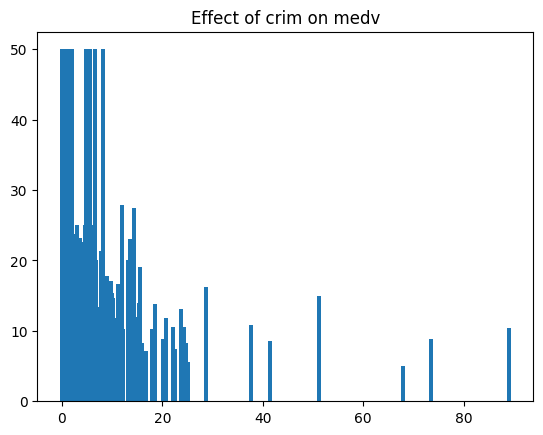

In [ ]:
generate_bar_graph('crim')

Higher crime rates are associated with lower home values, which is expected as safety is a key factor in real estate.

indus meaning is Proportion of non-retail business acres per town


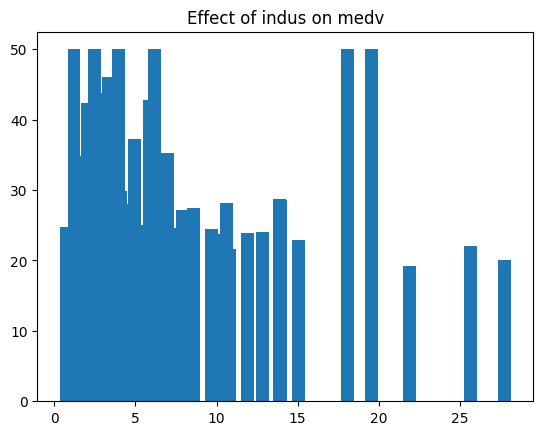

In [ ]:
generate_bar_graph('indus')

More industrial areas are generally less desirable to live in.

nox meaning is Concentration of nitrogen oxides in the air (parts per 10 million)


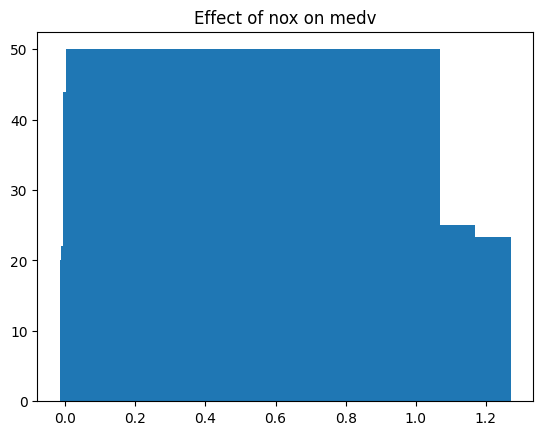

In [ ]:
generate_bar_graph('nox')

More polluted areas are generally less desirable to live in.

rm meaning is Average number of rooms per dwelling


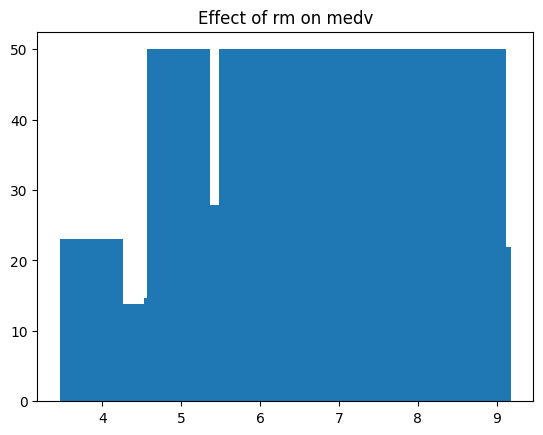

In [ ]:
generate_bar_graph('rm')

Larger homes tend to be more pricey than smaller ones.

age meaning is Proportion of owner-occupied units built before 1940


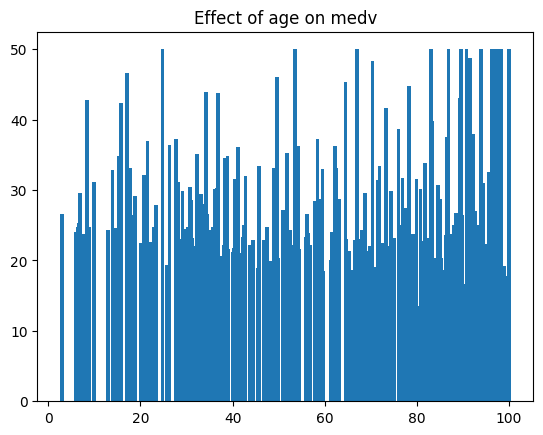

In [ ]:
generate_bar_graph('age')

This graph is very erratic to drive any conclusion from and I cannot see much of a pattern.

dis meaning is Weighted distances to Boston employment centers


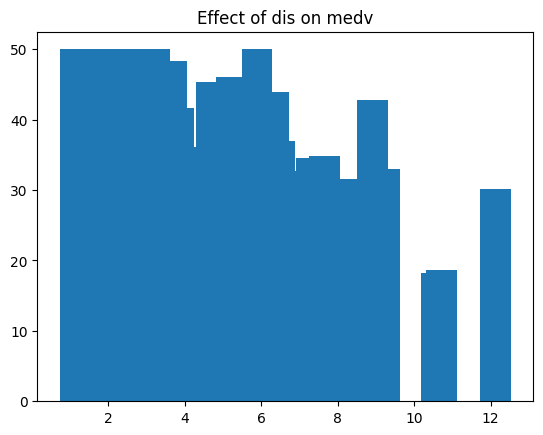

In [ ]:
generate_bar_graph('dis')

ones located farther from employment centers tend to have slightly higher values, possibly because suburban or rural homes are valued more.

rad meaning is Index of accessibility to radial highways


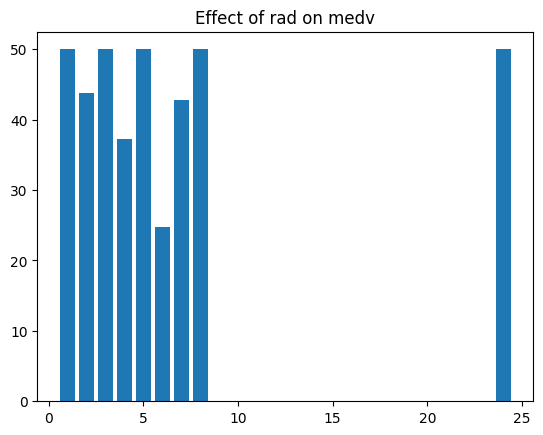

In [ ]:
generate_bar_graph('rad')

Proximity to major roads might reduce desirability due to noise or traffic.

tax meaning is Property tax rate per $10,000


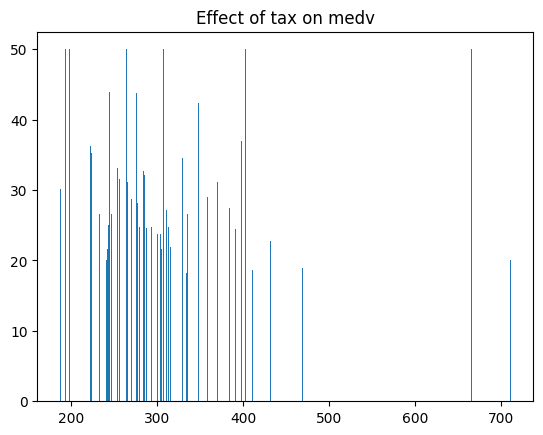

In [ ]:
generate_bar_graph('tax')

Higher taxes are mostly seem less attractive as compared to higher taxes.

ptratio meaning is Pupil-teacher ratio by town


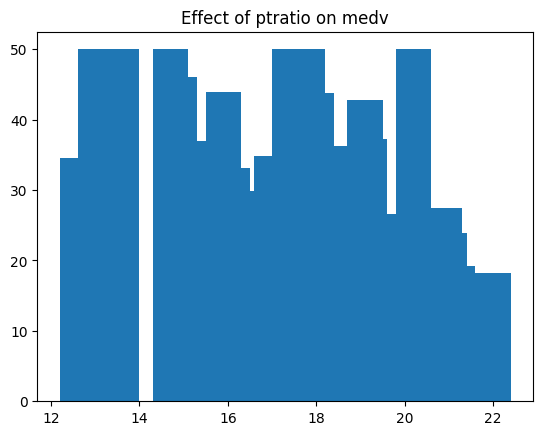

In [ ]:
generate_bar_graph('ptratio')

b meaning is 1000(Bk - 0.63)^2, where Bk is the proportion of Black residents by town


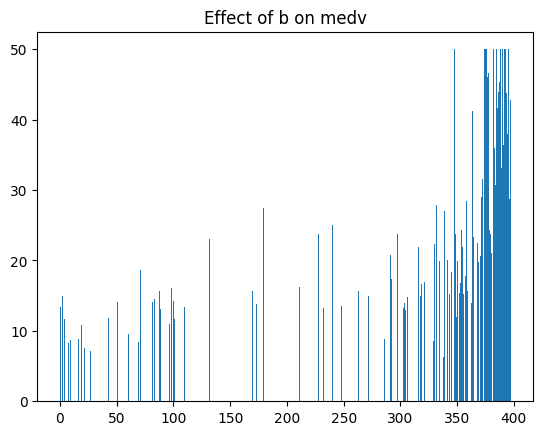

In [ ]:
generate_bar_graph('b')

lstat meaning is Percentage of lower status of the population


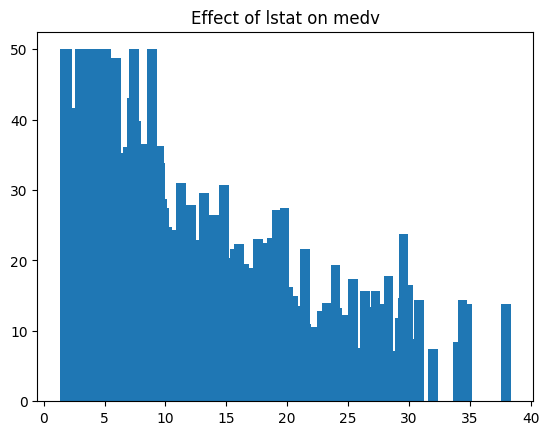

In [ ]:
generate_bar_graph('lstat')

Higher percentages of lower-status populations are associated with lower home values.

In [ ]:
# Correlation of different factors with medv
correlations = train_df.corr()['medv'].sort_values(ascending=False)
correlations

,medv
medv,1.000000
rm,0.710762
b,0.339918
dis,0.235114
age,-0.340216
crim,-0.380091
rad,-0.387467
nox,-0.415768
tax,-0.459795
indus,-0.470546


Text(0.5, 1.0, 'Correlation Matrix')

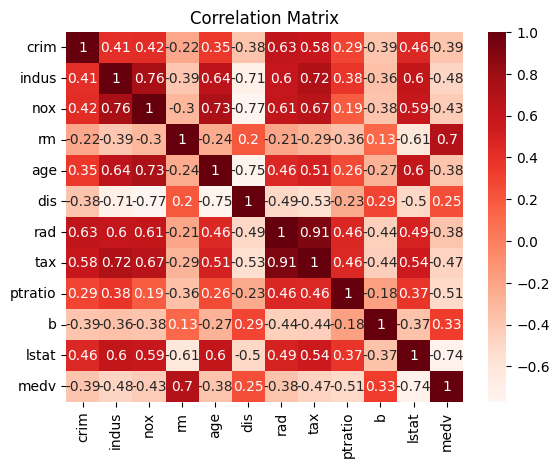

In [ ]:
sns.heatmap(boston.corr(numeric_only = True), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

These correlations also somewhat justify the prediction that we made.

Now we will start with the ML. We are divin=ding the features(X) and target variable(Y)

In [ ]:
X_train = train_df.drop('medv', axis=1)
Y_train = train_df['medv']

In [ ]:
X_test = test_df.drop('medv', axis=1)
Y_test = test_df['medv']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(Y_test, Y_pred, squared=False)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 5.111561582799804
Root Mean Squared Error: 2.260876286487123
R-squared: 0.6437104334623862


In [ ]:
model.coef_

array([-1.13679216e-01,  4.62120856e-02, -1.67410308e+01,  4.60116312e+00,
       -7.60132534e-03, -1.26327272e+00,  2.64425875e-01, -9.58314338e-03,
       -1.04734076e+00,  1.30021578e-02, -5.18126703e-01])

In [ ]:
model.intercept_

30.68843954575493

In [ ]:
#Let us use different approaches now

In [ ]:
from sklearn.linear_model import Ridge

# Initializing and training the Ridge regression model
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, Y_train)

# Making predictions with Ridge
Y_pred_ridge = ridge_model.predict(X_test)

# Evaluating Ridge regression
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(Y_test, Y_pred_ridge)

print(f"Ridge Regression -> MSE: {mse_ridge}, RMSE: {rmse_ridge}, R2: {r2_ridge}")


Ridge Regression -> MSE: 26.260387761348866, RMSE: 5.124489024414909, R2: 0.6419059998045078


In [ ]:
from sklearn.linear_model import Lasso

# Initializing and training the Lasso regression model
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, Y_train)

# Making predictions with Lasso
Y_pred_lasso = lasso_model.predict(X_test)

# Evaluating Lasso regression
mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(Y_test, Y_pred_lasso)

print(f"Lasso Regression -> MSE: {mse_lasso}, RMSE: {rmse_lasso}, R2: {r2_lasso}")


Lasso Regression -> MSE: 25.982593690337087, RMSE: 5.097312398738877, R2: 0.6456940775367648


Now let us explore some other models which I found in the internet.

In [ ]:
from sklearn.linear_model import ElasticNet

# Initializing and training the ElasticNet model
elasticnet_model = ElasticNet(alpha=0.1)
elasticnet_model.fit(X_train, Y_train)

# Making predictions with ElasticNet
Y_pred_elasticnet = elasticnet_model.predict(X_test)

# Evaluating ElasticNet regression
mse_elasticnet = mean_squared_error(Y_test, Y_pred_elasticnet)
rmse_elasticnet = np.sqrt(mse_elasticnet)
r2_elasticnet = r2_score(Y_test, Y_pred_elasticnet)

print(f"ElasticNet -> MSE: {mse_elasticnet}, RMSE: {rmse_elasticnet}, R2: {r2_elasticnet}")


ElasticNet -> MSE: 26.550348232566634, RMSE: 5.152703002557651, R2: 0.637952017632555


In [ ]:
print(f"Linear Regression -> MSE: {mse}, RMSE: {rmse}, R2: {r2}")
print(f"Ridge Regression -> MSE: {mse_ridge}, RMSE: {rmse_ridge}, R2: {r2_ridge}")
print(f"Lasso Regression -> MSE: {mse_lasso}, RMSE: {rmse_lasso}, R2: {r2_lasso}")
print(f"ElasticNet -> MSE: {mse_elasticnet}, RMSE: {rmse_elasticnet}, R2: {r2_elasticnet}")


Linear Regression -> MSE: 5.087163280198671, RMSE: 2.255474069945977, R2: 0.6471035704945931
Ridge Regression -> MSE: 26.260387761348866, RMSE: 5.124489024414909, R2: 0.6419059998045078
Lasso Regression -> MSE: 25.982593690337087, RMSE: 5.097312398738877, R2: 0.6456940775367648
ElasticNet -> MSE: 26.550348232566634, RMSE: 5.152703002557651, R2: 0.637952017632555


We tried all the different types of regression but the best is the normal Linear Regression as it is giving the least RMSE value and lease MSE value. the value of r2 is almost similar in all the four analysis. Before that let us see what it really is.

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model.

Now let us check for multicollinearilty using varience inflation factor (VIF).


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating the VIF for each feature in the dataset
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Computing the VIF for the predictors in the dataset
vif_data = calculate_vif(X_train)

# Displaying VIF values
print(vif_data)


    feature        VIF
0      crim   1.967003
1     indus  13.416626
2       nox  74.053522
3        rm  73.709424
4       age  20.676620
5       dis  11.797954
6       rad  14.604865
7       tax  55.327230
8   ptratio  67.795552
9         b  19.601380
10    lstat  10.417172


In [ ]:
import statsmodels.api as sm

# Adding constant term for intercept
X_train_const = sm.add_constant(X_train)

# Fitting the OLS (Ordinary Least Squares) model
model = sm.OLS(Y_train, X_train_const)
results = model.fit()

# Summary of the regression model (including p-values and significance of coefficients)
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     102.7
Date:                Wed, 18 Sep 2024   Prob (F-statistic):          4.00e-108
Time:                        11:08:26   Log-Likelihood:                -1201.1
No. Observations:                 404   AIC:                             2426.
Df Residuals:                     392   BIC:                             2474.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.6884      5.761      5.327      0.0

# P-Value

All the factors who have a p-value of less than 0.05 are considered significant in telling the value of medv while others with p-value of more than 0.05 are considered not that significant in telling the value of medv.

# Confidence interval

A confidence interval gives us a range of values that we are reasonably sure contains the true value of the coefficient. For a 95% confidence level, we're saying that we are 95% confident that the true coefficient lies within this range.

If zero is not within the confidence interval, it means we are 95% confident that the coefficient is not equal to zero, which leads us to reject the null hypothesis. This suggests that the predictor has a significant effect on the outcome variable.

If the confidence interval includes zero, it means there’s a possibility (based on the data) that the true value of the coefficient could be zero. In such cases, we cannot reject the null hypothesis because the predictor might have no effect on the outcome.

Based on this we can also peform a linear regression removing age and indus.

In [ ]:
# Plotting predicted vs actual values to assess linearity
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=Y_test,
    y=Y_pred,
    mode='markers',
    marker=dict(size=8, color='rgba(255, 182, 193, .9)', line=dict(width=2, color='rgba(255, 182, 193, .9)')),
    name='Predicted vs Actual'
))

fig.update_layout(
    title='Predicted vs Actual Values',
    xaxis_title='Actual values',
    yaxis_title='Predicted values'
)

fig.show()

In [ ]:
# Calculate residuals
residuals = Y_test - Y_pred

# Create the plot
fig = go.Figure()

# Add scatter plot for residuals vs fitted values
fig.add_trace(go.Scatter(
    x=Y_pred,
    y=residuals,
    mode='markers',
    name='Residuals vs Fitted values',
    marker=dict(color='blue')
))

# Add horizontal line at y=0
fig.add_shape(
    type='line',
    x0=min(Y_pred),
    x1=max(Y_pred),
    y0=0,
    y1=0,
    line=dict(color='red', width=2, dash='dash')
)

# Update layout
fig.update_layout(
    title='Residuals vs Fitted values',
    xaxis_title='Fitted values',
    yaxis_title='Residuals'
)

# Show the plot
fig.show()


In [ ]:

import scipy.stats as stats

# Calculating Q-Q plot values
quantiles = np.linspace(0, 1, len(residuals))
theoretical_quantiles = stats.norm.ppf(quantiles)
sample_quantiles = np.sort(residuals)

# Q-Q Plot
fig_qq = go.Figure()

fig_qq.add_trace(go.Scatter(
    x=theoretical_quantiles,
    y=sample_quantiles,
    mode='markers',
    name='Q-Q Plot'
))

fig_qq.add_trace(go.Scatter(
    x=theoretical_quantiles,
    y=theoretical_quantiles,
    mode='lines',
    name='45-degree line',
    line=dict(color='red', dash='dash')
))

fig_qq.update_layout(
    title='Q-Q Plot',
    xaxis_title='Theoretical Quantiles',
    yaxis_title='Sample Quantiles'
)

fig_qq.show()

# Histogram of Residuals
fig_hist = go.Figure()

fig_hist.add_trace(go.Histogram(
    x=residuals,
    nbinsx=30,
    marker=dict(color='blue', line=dict(color='black', width=1))
))

fig_hist.update_layout(
    title='Histogram of Residuals',
    xaxis_title='Residuals',
    yaxis_title='Frequency'
)

fig_hist.show()


I am removing three of the stuff with the highest collinearity and peforming the regression again.

A VIF above a high means very high collinearity which means it could be redundant to the model

In [ ]:
meanings

{'crim': 'Per capita crime rate by town',
 'zn': 'Proportion of residential land zoned for large lots over 25,000 sq. ft.',
 'indus': 'Proportion of non-retail business acres per town',
 'chas': 'Charles River dummy variable (1 if the tract bounds river, 0 otherwise)',
 'nox': 'Concentration of nitrogen oxides in the air (parts per 10 million)',
 'rm': 'Average number of rooms per dwelling',
 'age': 'Proportion of owner-occupied units built before 1940',
 'dis': 'Weighted distances to Boston employment centers',
 'rad': 'Index of accessibility to radial highways',
 'tax': 'Property tax rate per $10,000',
 'ptratio': 'Pupil-teacher ratio by town',
 'b': '1000(Bk - 0.63)^2, where Bk is the proportion of Black residents by town',
 'lstat': 'Percentage of lower status of the population',
 'medv': 'Median value of owner-occupied homes in $1000s'}

In [ ]:
# Removing 'nox', 'rm', and 'ptratio' from all datasets
boston = boston.drop(['nox', 'tax', 'ptratio'], axis=1)
train_df = train_df.drop(['nox', 'tax', 'ptratio'], axis=1)
test_df = test_df.drop(['nox', 'tax', 'ptratio'], axis=1)

# Now we will start with the ML.
X_train = train_df.drop('medv', axis=1)
Y_train = train_df['medv']
X_test = test_df.drop('medv', axis=1)
Y_test = test_df['medv']


In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred, squared=False)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
print(model.coef_)
print(model.intercept_)


Mean Squared Error: 5.7336919422551835
Root Mean Squared Error: 2.3945128820399324
R-squared: 0.5517042504569836
[-0.09875666 -0.11079264  5.4922113  -0.0260241  -1.12775    -0.03598849
  0.01296547 -0.54536996]
-1.7325803889204394


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating the VIF for each feature in the dataset
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Computing the VIF for the predictors in the dataset
vif_data = calculate_vif(X_train)

# Displaying VIF values
print(vif_data)

  feature        VIF
0    crim   1.962097
1   indus   8.874474
2      rm  38.989789
3     age  19.099838
4     dis  10.080819
5     rad   4.867006
6       b  17.802760
7   lstat   8.277089


In [ ]:
import statsmodels.api as sm

# Adding constant term for intercept
X_train_const = sm.add_constant(X_train)

# Fitting the OLS (Ordinary Least Squares) model
model = sm.OLS(Y_train, X_train_const)
results = model.fit()

# Summary of the regression model (including p-values and significance of coefficients)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     114.6
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           4.90e-98
Time:                        11:08:27   Log-Likelihood:                -1232.6
No. Observations:                 404   AIC:                             2483.
Df Residuals:                     395   BIC:                             2519.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7326      4.247     -0.408      0.6

As per me, I think this model is more suited as compared to previous model.

In [ ]:
boston = pd.read_csv('BostonHousing.csv')

In [ ]:
# Removing 'nox', 'rm', and 'ptratio' from all datasets
boston = boston.drop(['zn', 'chas', 'age', 'indus'], axis=1)
boston.fillna(boston.mean(), inplace=True)

In [ ]:
train_df, test_df = train_test_split(boston, test_size=0.2, random_state=42)

print(train_df.shape)
print(test_df.shape)


(404, 10)
(102, 10)


In [ ]:
X_train = train_df.drop('medv', axis=1)
Y_train = train_df['medv']
X_test = test_df.drop('medv', axis=1)
Y_test = test_df['medv']

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred, squared=False)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
print(model.coef_)
print(model.intercept_)

Mean Squared Error: 5.087163280198671
Root Mean Squared Error: 2.255474069945977
R-squared: 0.6471035704945931
[-1.14892180e-01 -1.64346834e+01  4.50961943e+00 -1.25765850e+00
  2.55431953e-01 -8.50875996e-03 -1.04358588e+00  1.28367490e-02
 -5.24579234e-01]
30.786332263306868


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating the VIF for each feature in the dataset
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Computing the VIF for the predictors in the dataset
vif_data = calculate_vif(X_train)

# Displaying VIF values
print(vif_data)

   feature        VIF
0     crim   1.963691
1      nox  60.632022
2       rm  66.262887
3      dis   8.045840
4      rad  13.872295
5      tax  47.731002
6  ptratio  65.050817
7        b  19.521364
8    lstat   9.536076


In [ ]:
import statsmodels.api as sm

# Adding constant term for intercept
X_train_const = sm.add_constant(X_train)

# Fitting the OLS (Ordinary Least Squares) model
model = sm.OLS(Y_train, X_train_const)
results = model.fit()

# Summary of the regression model (including p-values and significance of coefficients)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     125.8
Date:                Wed, 18 Sep 2024   Prob (F-statistic):          4.51e-110
Time:                        11:08:28   Log-Likelihood:                -1201.5
No. Observations:                 404   AIC:                             2423.
Df Residuals:                     394   BIC:                             2463.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7863      5.737      5.367      0.0